In [2]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/msambare/fer2013")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nouraanesam
Your Kaggle Key: ··········


100%|██████████| 60.3M/60.3M [00:04<00:00, 14.2MB/s]


In [ ]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import glob as gb
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPool2D,BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [ ]:
root=r"/content/fer2013/train"
fnames= os.listdir(root)

In [ ]:
len(fnames)

7

In [ ]:
for i in range (7):
    print (fnames[i])

fear
sad
happy
angry
neutral
disgust
surprise


In [ ]:
for i in range (7):
    print (os.path.join(root,fnames[i]))

/content/fer2013/train/fear
/content/fer2013/train/sad
/content/fer2013/train/happy
/content/fer2013/train/angry
/content/fer2013/train/neutral
/content/fer2013/train/disgust
/content/fer2013/train/surprise


In [ ]:
images=[]
for folder in os.listdir(root):
  files=gb.glob(pathname=str(root+'/'+folder+'/*.jpg'))
  for file in files:
    image=plt.imread(file)
    images.append(image.shape)
pd.Series(images).value_counts()

(48, 48)    28709
dtype: int64

In [ ]:
code = {'angry':0 , 'disgust':1 , 'fear':2 , 'happy':3 , 'neutral':4 , 'sad':5 , 'surprise':6}
def getcode(n) :
  for x ,y in code.items():
    if n==y :
        return x

In [ ]:
root1=r"/content/fer2013/test"
fnames1= os.listdir(root1)

In [ ]:
len(fnames1)

7

In [ ]:
for i in range (7):
    print (fnames1[i])

fear
sad
happy
angry
neutral
disgust
surprise


In [ ]:
images=[]
for folder in os.listdir(root1):
  files=gb.glob(pathname=str(root1+'/'+folder+'/*.jpg'))
  for file in files:
    image=plt.imread(file)
    images.append(image.shape)
pd.Series(images).value_counts()

(48, 48)    7178
dtype: int64

In [ ]:
x_train=[]
y_train=[]
for folder in os.listdir(root):
  files=gb.glob(pathname=str(root+'/'+folder+'/*.jpg'))
  for file in files:
    image = cv2.imread(file, cv2.IMREAD_COLOR)
    x_train.append(image)
    y_train.append(code[folder])

print(f'we have {len(x_train)} items in x_train')

we have 28709 items in x_train


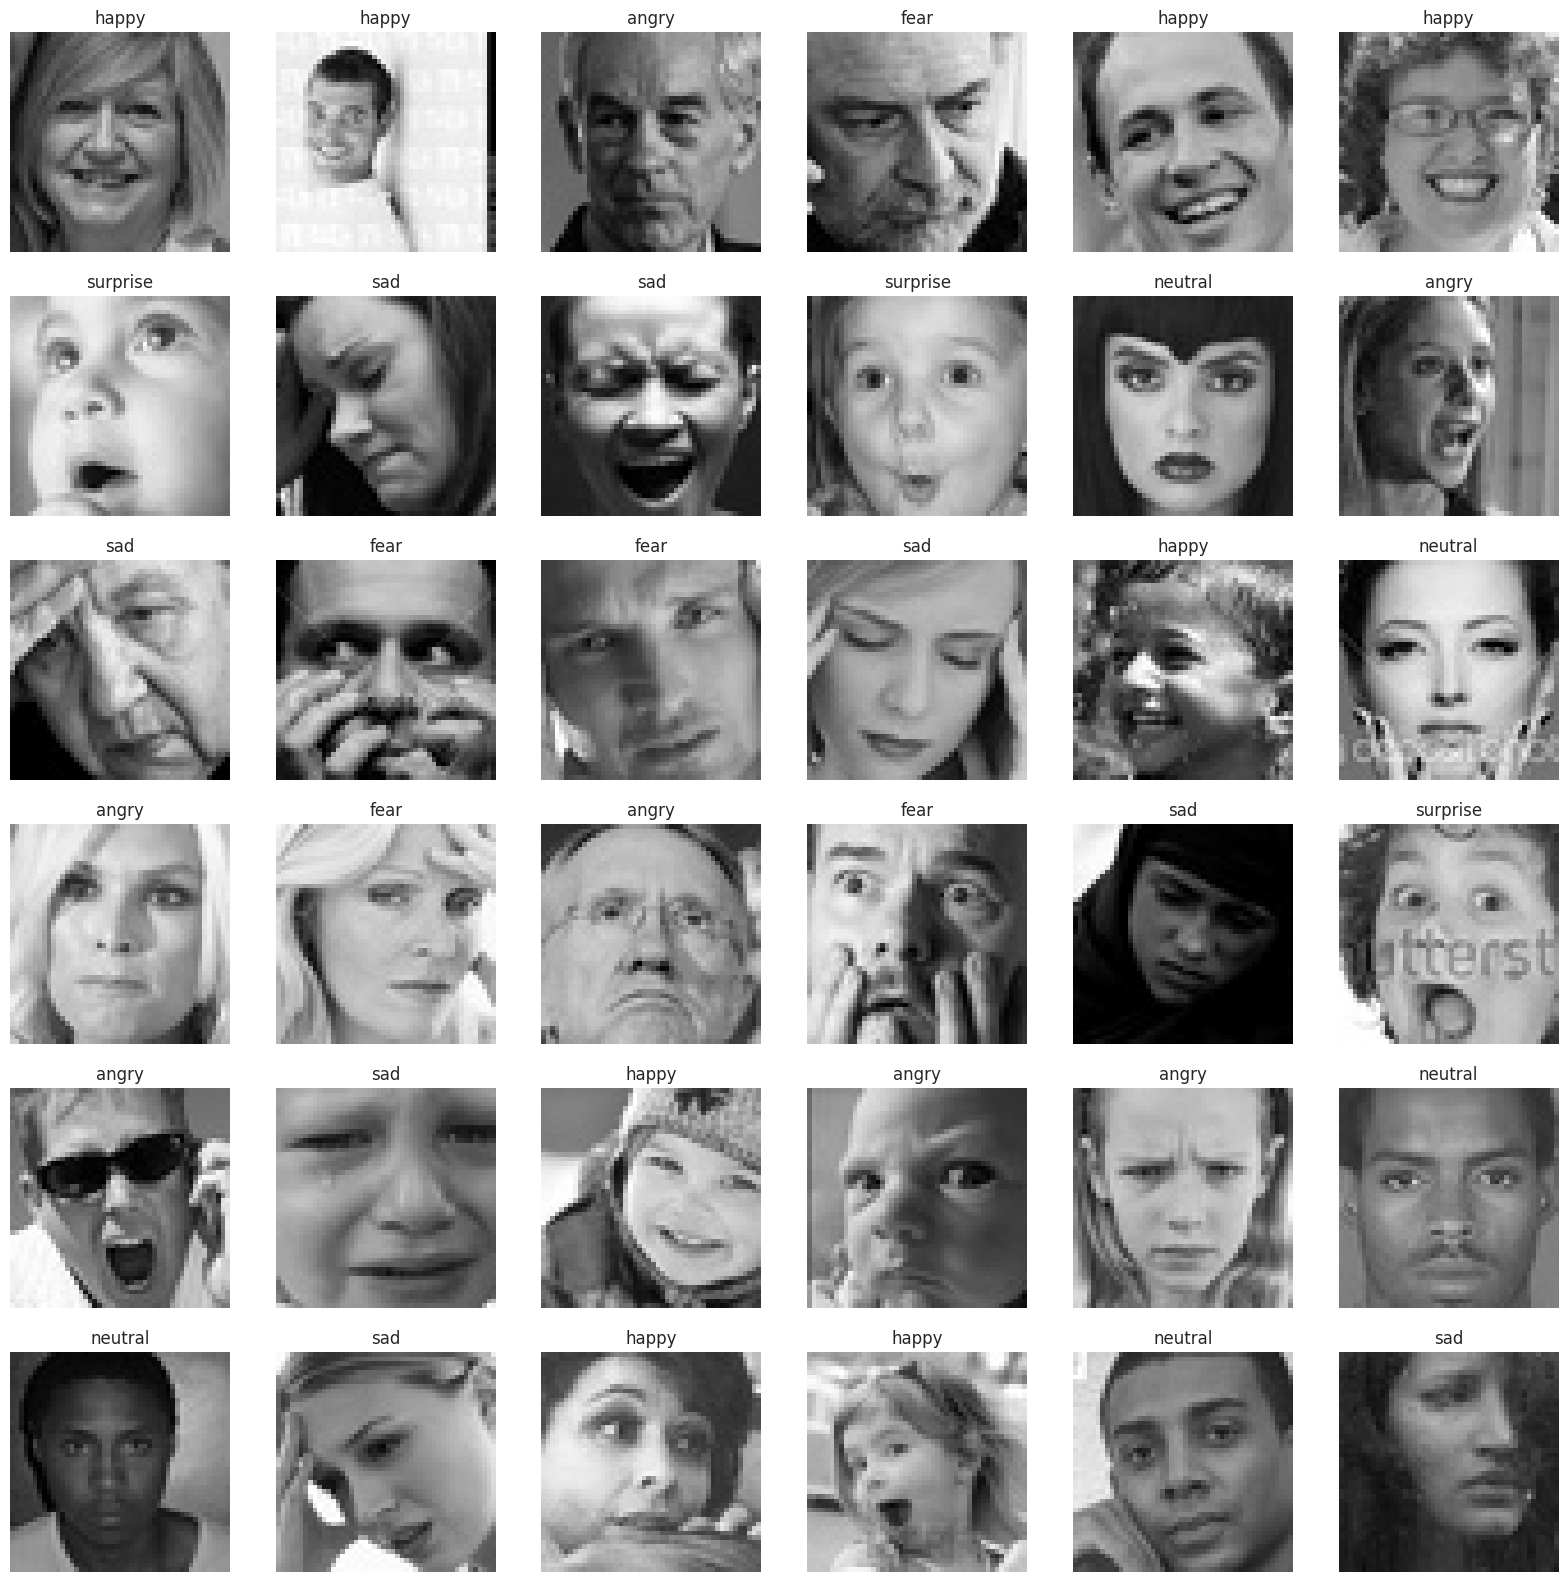

In [ ]:
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , len(x_train),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(getcode(y_train[i]))

In [ ]:
#rgb_image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
x_train=[]
y_train=[]
for folder in os.listdir(root):
  files=gb.glob(pathname=str(root+'/'+folder+'/*.jpg'))
  for file in files:
    image = cv2.imread(file, cv2.COLOR_RGB2BGR)
    x_train.append(image)
    y_train.append(code[folder])

print(f'we have {len(x_train)} items in x_train')

we have 28709 items in x_train


In [ ]:
x_test=[]
y_test=[]
for folder in os.listdir(root1):
  files=gb.glob(pathname=str(root1+'/'+folder+'/*.jpg'))
  for file in files:
    image = cv2.imread(file, cv2.IMREAD_COLOR)
    x_test.append(image)
    y_test.append(code[folder])

print(f'we have {len(x_test)} items in x_test')

we have 7178 items in x_test


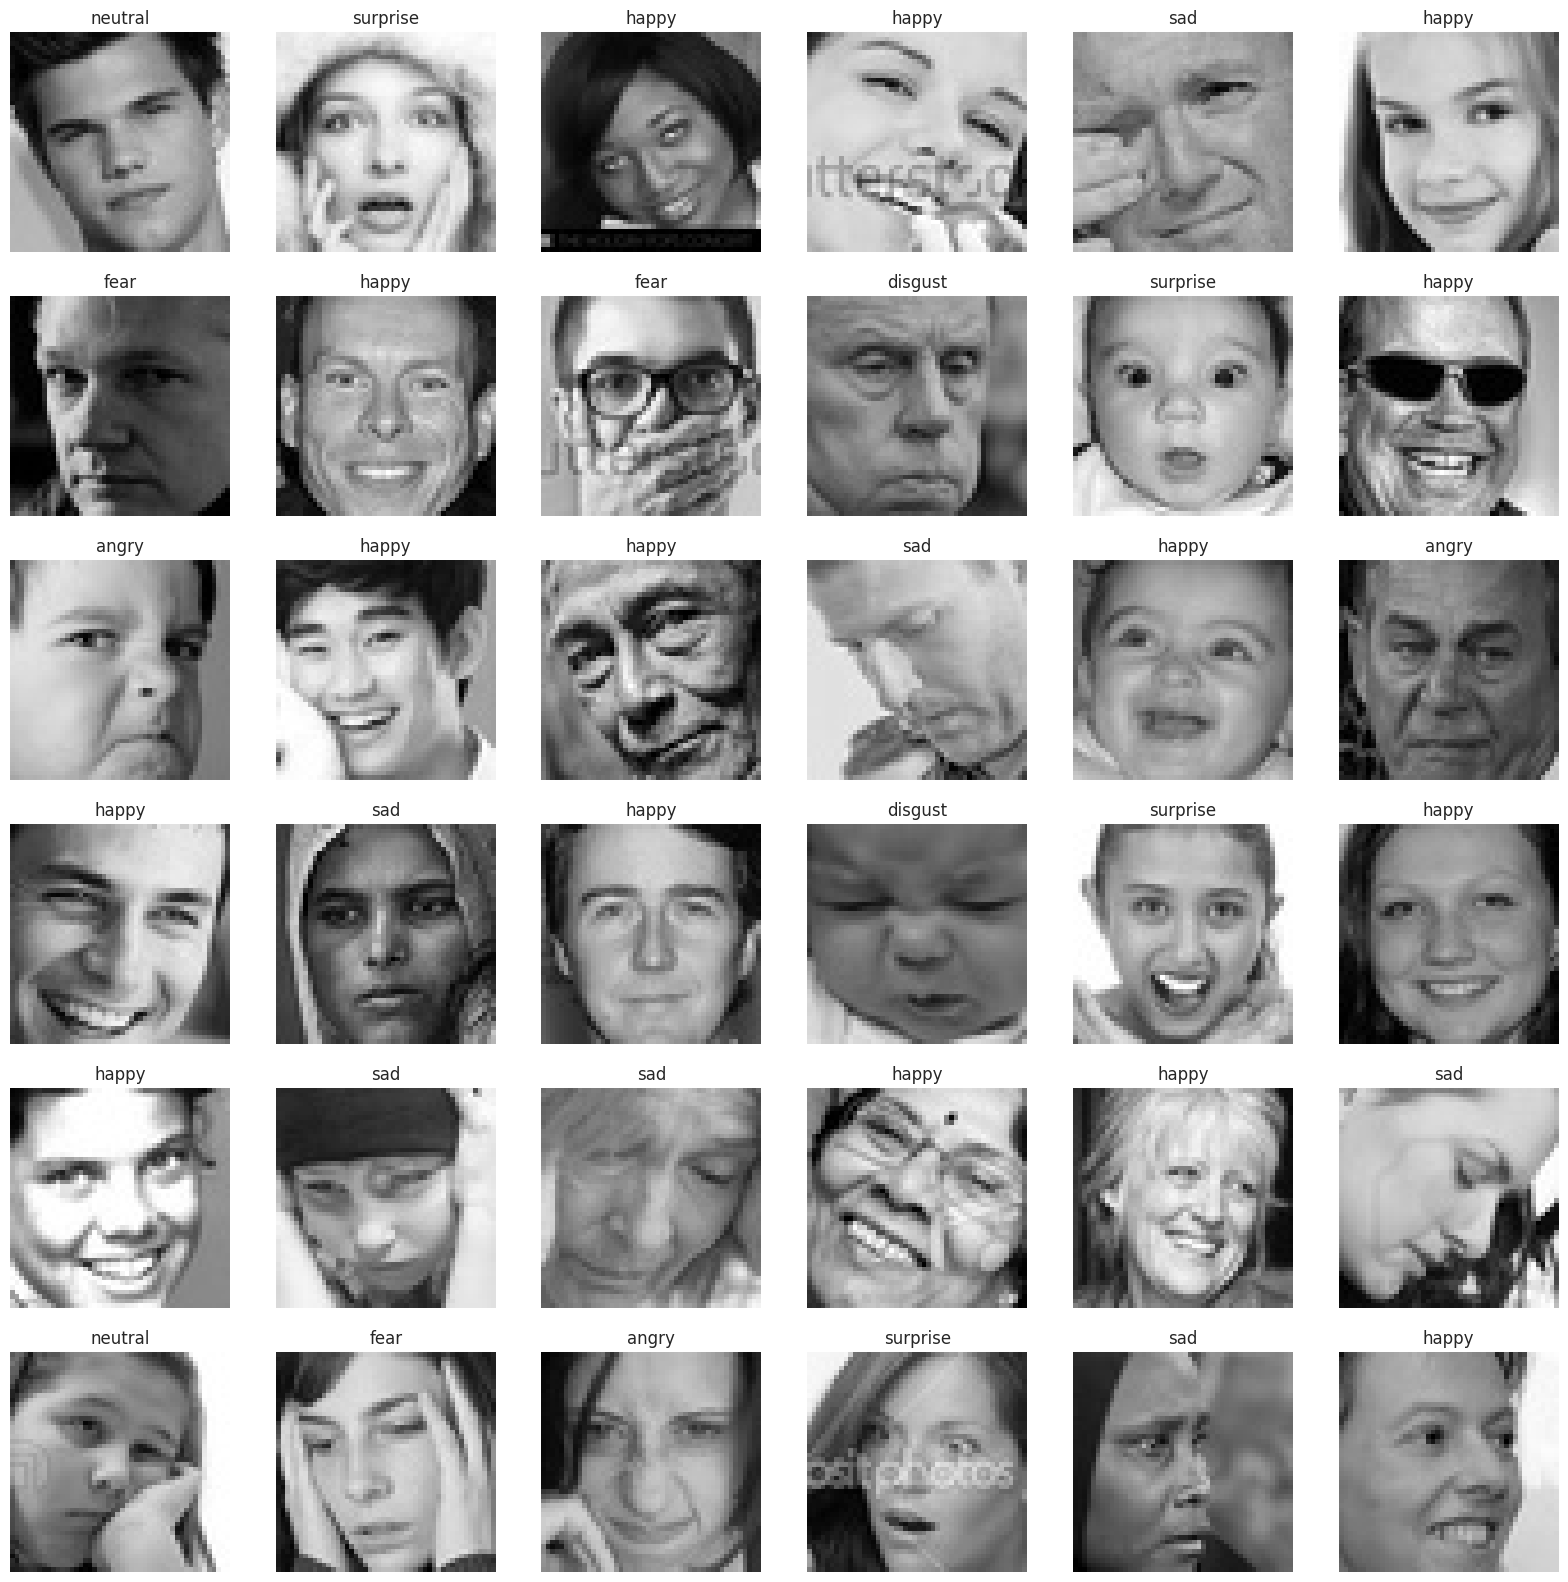

In [ ]:
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , len(x_test),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title(getcode(y_test[i]))

In [ ]:
#now how about image size in test folder
size=[]
for folder in os.listdir(root1):
  files=gb.glob(pathname=str(root1+'/'+folder+'/*.jpg'))
  for file in files:
    image=plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(48, 48)    7178
dtype: int64

In [ ]:
images=np.array(size)

In [ ]:
type(images)

numpy.ndarray

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28709, 48, 48)
(28709,)
(7178, 48, 48, 3)
(7178,)


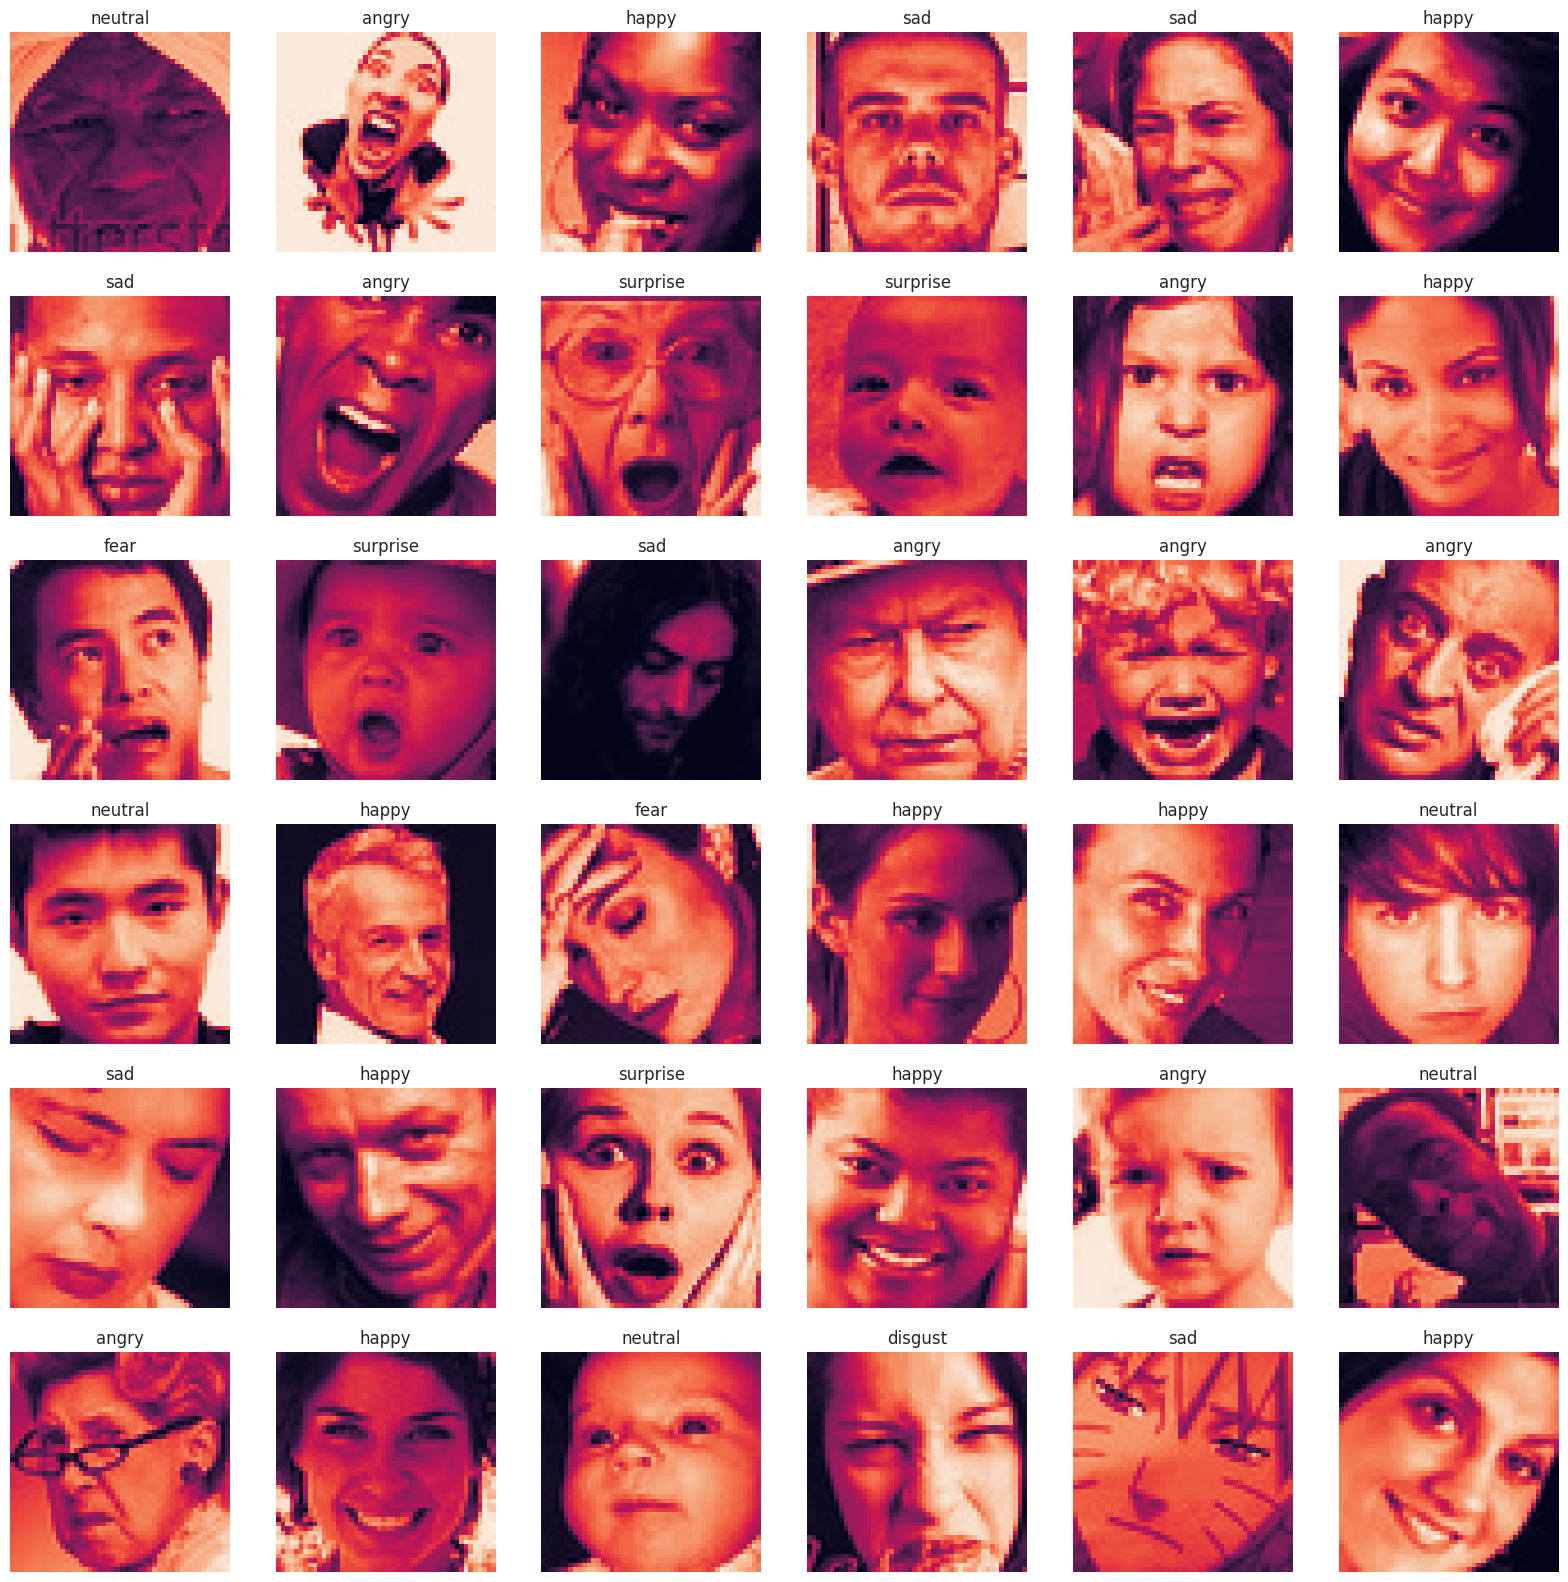

In [ ]:
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , len(x_train),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(getcode(y_train[i]))

In [ ]:
image = cv2.imread(file, cv2.IMREAD_COLOR)

In [ ]:
kernel_sharpen = np.array([[-1,-1,-1],
                           [-1, 9,-1],
                           [-1,-1,-1]])

In [ ]:
sharpened_image = cv2.filter2D(image, -1, kernel_sharpen)

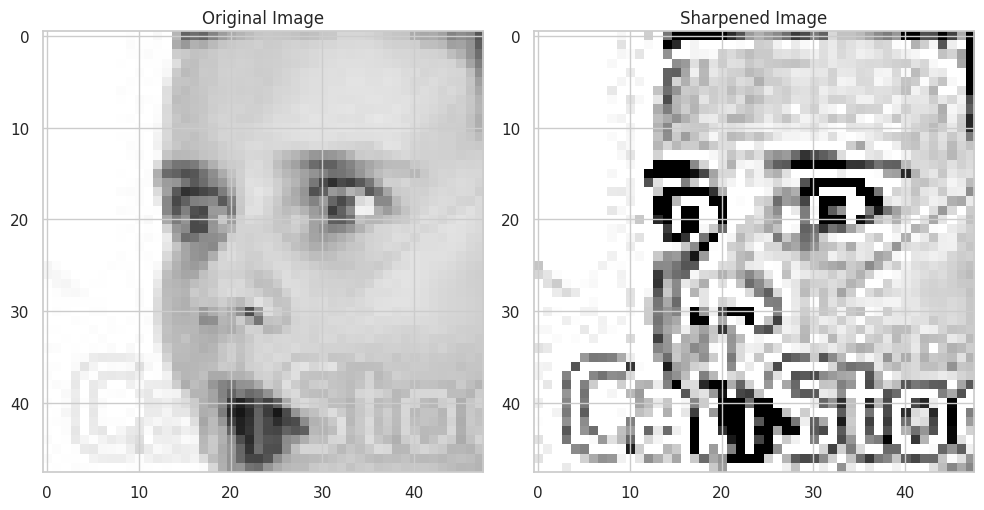

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()


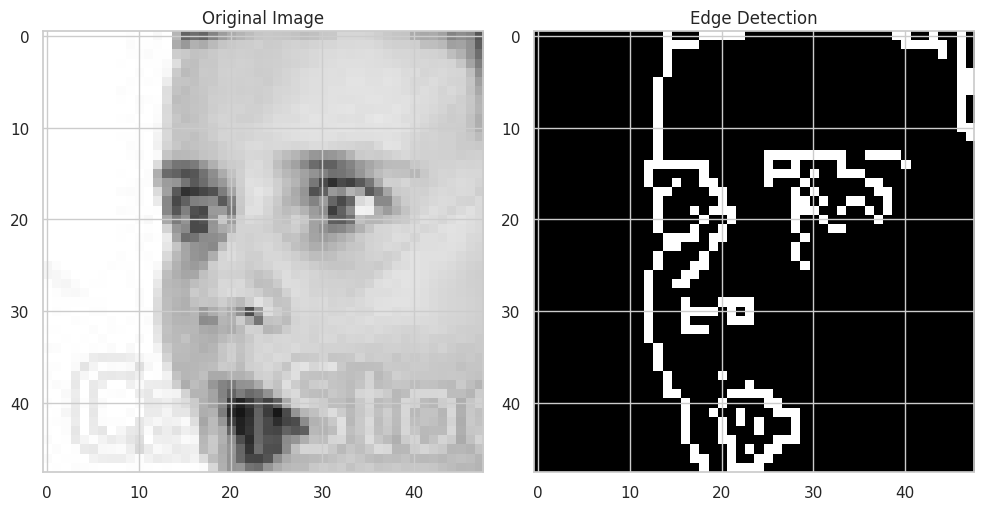

In [ ]:
# تحويل الصورة إلى الأبيض والأسود
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# تطبيق فلتر الكشف عن الحواف (Canny Edge Detection)
edges = cv2.Canny(image, 100, 200)

# عرض الصورة الأصلية ونتيجة فلتر الكشف عن الحواف
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

plt.tight_layout()
plt.show()

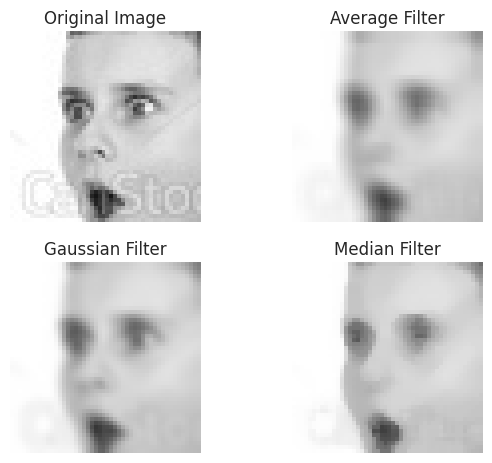

In [ ]:
# تطبيق Average Filter
average_filtered = cv2.blur(image, (5, 5))

# تطبيق Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

# تطبيق Median Filter
median_filtered = cv2.medianBlur(image, 5) 
# عرض الصور الأصلية والمُعالجة
titles = ['Original Image', 'Average Filter', 'Gaussian Filter', 'Median Filter']
images = [image, average_filtered, gaussian_filtered, median_filtered]

for i in range(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

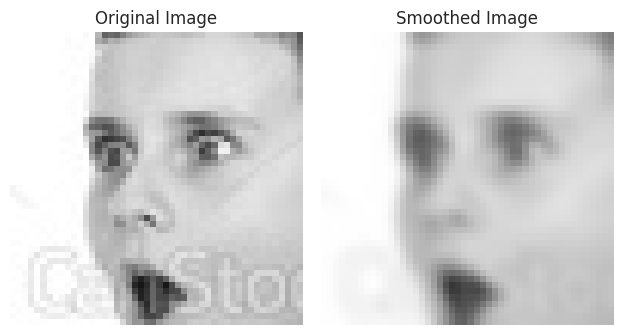

In [ ]:
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)  # يمكن تعديل حجم الفلتر حسب الحاجة

# عرض الصورة الأصلية والصورة المحسنة
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.title('Smoothed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [28]:
# @title We will build the CNN Model


In [ ]:
import os
import pandas as pd

train_dir = '/content/fer2013/train/'
test_dir = '/content/fer2013/test/'
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = os.path.join(path, expression)  # Use os.path.join to construct the directory path
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')

print("Training Data:")
print(train_count)

print("\nTesting Data:")
print(test_count)

Training Data:
       fear   sad  happy  angry  neutral  disgust  surprise
train  4097  4830   7215   3995     4965      436      3171

Testing Data:
      fear   sad  happy  angry  neutral  disgust  surprise
test  1024  1247   1774    958     1233      111       831


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation='softmax'))
 #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import schedules

def get_model(input_size, classes=7):
    # Initializing the CNN
    model = tf.keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation='softmax'))

    # Using the legacy optimizer with decay
    initial_learning_rate = 0.0001
    lr_schedule = schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.9,
        staircase=True)

    model.compile(
        optimizer=Adam(learning_rate=lr_schedule),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

fernet = get_model((row, col, 1), classes)
fernet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [ ]:
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger

chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')  # Corrected typo here

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')
callbacks = [checkpoint, reduce_lr, csv_logger, tensorboard_callback]


In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - ETA: 0s - loss: 4.2702 - accuracy: 0.2749
Epoch 1: val_loss improved from inf to 4.73528, saving model to ferNet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - 49s 94ms/step - loss: 4.2702 - accuracy: 0.2749 - val_loss: 4.7353 - val_accuracy: 0.2231 - lr: 1.0000e-04
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 3.4792 - accuracy: 0.3395
Epoch 2: val_loss improved from 4.73528 to 3.09144, saving model to ferNet.h5
448/448 [==============================] - 45s 100ms/step - loss: 3.4792 - accuracy: 0.3395 - val_loss: 3.0914 - val_accuracy: 0.4054 - lr: 1.0000e-04
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 2.9303 - accuracy: 0.3787
Epoch 3: val_loss improved from 3.09144 to 2.59473, saving model to ferNet.h5
448/448 [==============================] - 45s 100ms/step - loss: 2.9303 - accuracy: 0.3787 - val_loss: 2.5947 - val_accuracy: 0.4453 - lr: 1.0000e-04
Epoch 4/60
448/448 [==============================] - ETA: 0s - loss: 2.5005 - accuracy: 0.4154
Epoch 4: val_loss improved from 2.59473 to 2.23168, saving model to ferNet.h5
448/448 [=================

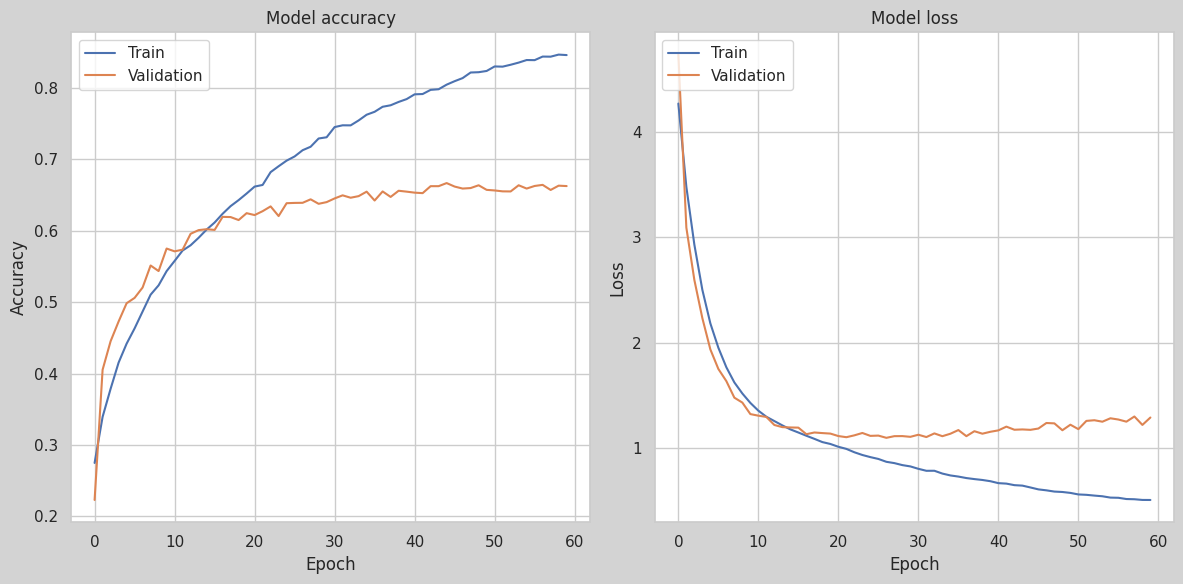

In [ ]:
import matplotlib.pyplot as plt



# Plot training history with a gray background
def plot_history(history):
    plt.figure(figsize=(12, 6), facecolor='lightgray')  # Set the background color to light gray

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the plot function with the history object
plot_history(hist)

In [29]:
# @title We apply 4-pre-trained Transfer Learning Model


In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator, load_img
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from keras.utils import plot_model
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime


In [37]:
# @title VGG16


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model without top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(7, activation='softmax')(x)

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
transfer_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

transfer_model.summary()


58889256/58889256 [==============================] - 2s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '//content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
epochs = 50

history = transfer_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
717/717 [==============================] - 144s 189ms/step - loss: 1.6868 - accuracy: 0.3266 - val_loss: 1.5976 - val_accuracy: 0.3698
Epoch 2/50
717/717 [==============================] - 130s 181ms/step - loss: 1.5797 - accuracy: 0.3835 - val_loss: 1.5528 - val_accuracy: 0.3876
Epoch 3/50
717/717 [==============================] - 110s 154ms/step - loss: 1.5357 - accuracy: 0.4046 - val_loss: 1.5480 - val_accuracy: 0.4001
Epoch 4/50
717/717 [==============================] - 130s 181ms/step - loss: 1.5100 - accuracy: 0.4150 - val_loss: 1.5306 - val_accuracy: 0.3883
Epoch 5/50
717/717 [==============================] - 111s 154ms/step - loss: 1.4862 - accuracy: 0.4268 - val_loss: 1.5201 - val_accuracy: 0.4080
Epoch 6/50
717/717 [==============================] - 110s 153ms/step - loss: 1.4719 - accuracy: 0.4313 - val_loss: 1.4903 - val_accuracy: 0.4220
Epoch 7/50
717/717 [==============================] - 111s 155ms/step - loss: 1.4555 - accuracy: 0.4375 - val_loss: 1.5181 -

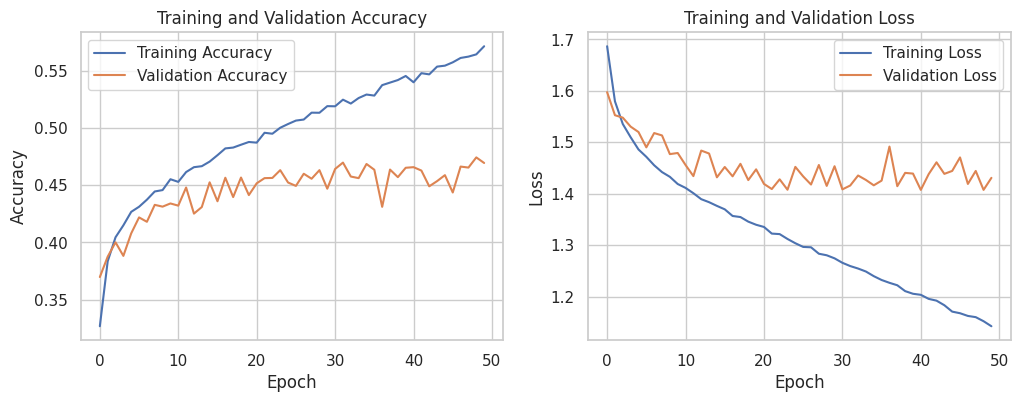

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming your model prediction function is called predict (replace it with your actual prediction function)
y_pred = transfer_model.predict(validation_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

180/180 [==============================] - 25s 140ms/step
Confusion Matrix:
[[121   4  85 194 154 145  96]
 [  9   0  16  15  15  18  14]
 [115  11 105 178 171 142  97]
 [209   6 160 350 276 263 179]
 [142   6 107 251 189 180 118]
 [174   7 102 205 188 157 133]
 [108   9  68 153 117  99  80]]

Classification Report:
              precision    recall  f1-score   support

       angry       0.14      0.15      0.14       799
     disgust       0.00      0.00      0.00        87
        fear       0.16      0.13      0.14       819
       happy       0.26      0.24      0.25      1443
     neutral       0.17      0.19      0.18       993
         sad       0.16      0.16      0.16       966
    surprise       0.11      0.13      0.12       634

    accuracy                           0.17      5741
   macro avg       0.14      0.14      0.14      5741
weighted avg       0.18      0.17      0.17      5741



In [38]:
# @title MobileNetV2


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 model without top (fully connected layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)  # Assuming you have 7 classes

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Set the pre-trained layers to be non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
transfer_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

transfer_model.summary()


9406464/9406464 [==============================] - 0s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
epochs = 50

history = transfer_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/50
717/717 [==============================] - 60s 67ms/step - loss: 1.6373 - accuracy: 0.3685 - val_loss: 1.5118 - val_accuracy: 0.4141
Epoch 2/50
717/717 [==============================] - 45s 63ms/step - loss: 1.5103 - accuracy: 0.4180 - val_loss: 1.4397 - val_accuracy: 0.4429
Epoch 3/50
717/717 [==============================] - 43s 60ms/step - loss: 1.4687 - accuracy: 0.4347 - val_loss: 1.4326 - val_accuracy: 0.4427
Epoch 4/50
717/717 [==============================] - 48s 67ms/step - loss: 1.4416 - accuracy: 0.4474 - val_loss: 1.3912 - val_accuracy: 0.4630
Epoch 5/50
717/717 [==============================] - 44s 61ms/step - loss: 1.4161 - accuracy: 0.4540 - val_loss: 1.3938 - val_accuracy: 0.4543
Epoch 6/50
717/717 [==============================] - 46s 65ms/step - loss: 1.4014 - accuracy: 0.4605 - val_loss: 1.3916 - val_accuracy: 0.4647
Epoch 7/50
717/717 [==============================] - 43s 60ms/step - loss: 1.3842 - accuracy: 0.4683 - val_loss: 1.3934 - val_accuracy:

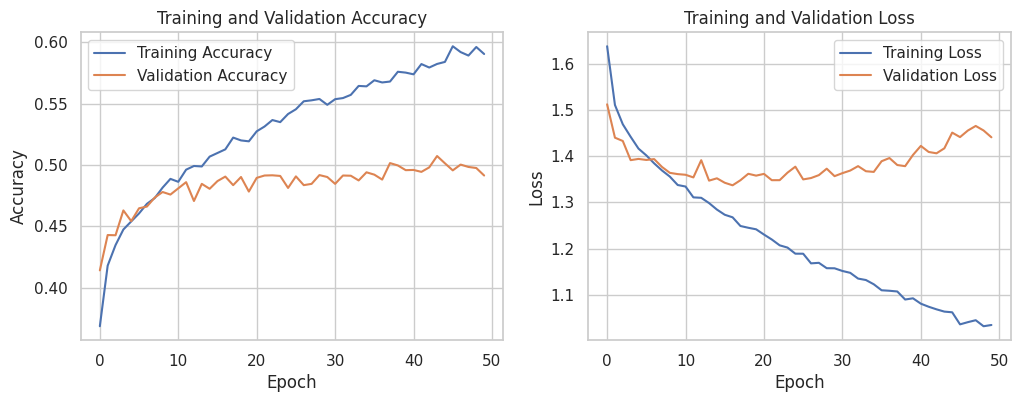

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming your model prediction function is called predict (replace it with your actual prediction function)
y_pred = transfer_model.predict(validation_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


180/180 [==============================] - 13s 66ms/step
Confusion Matrix:
[[ 77   0  61 252 114 190 105]
 [  6   0   6  23  11  27  14]
 [ 75   1  52 267 129 199  96]
 [134   1 115 447 252 330 164]
 [ 86   3  72 336 157 225 114]
 [ 76   4  71 327 148 235 105]
 [ 52   0  49 212  93 149  79]]

Classification Report:
              precision    recall  f1-score   support

       angry       0.15      0.10      0.12       799
     disgust       0.00      0.00      0.00        87
        fear       0.12      0.06      0.08       819
       happy       0.24      0.31      0.27      1443
     neutral       0.17      0.16      0.17       993
         sad       0.17      0.24      0.20       966
    surprise       0.12      0.12      0.12       634

    accuracy                           0.18      5741
   macro avg       0.14      0.14      0.14      5741
weighted avg       0.17      0.18      0.17      5741



In [ ]:
#we apply vgg16 and mobile net

In [39]:
# @title DenseNet121


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet121 model without top (fully connected layers)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)  # Assuming you have 7 classes

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Set the pre-trained layers to be non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

transfer_model.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
epochs = 50

history = transfer_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/50
717/717 [==============================] - 104s 130ms/step - loss: 1.7106 - accuracy: 0.3392 - val_loss: 1.5074 - val_accuracy: 0.4279
Epoch 2/50
717/717 [==============================] - 85s 118ms/step - loss: 1.5190 - accuracy: 0.4176 - val_loss: 1.4456 - val_accuracy: 0.4422
Epoch 3/50
717/717 [==============================] - 89s 125ms/step - loss: 1.4514 - accuracy: 0.4496 - val_loss: 1.4119 - val_accuracy: 0.4598
Epoch 4/50
717/717 [==============================] - 85s 118ms/step - loss: 1.4143 - accuracy: 0.4659 - val_loss: 1.3860 - val_accuracy: 0.4675
Epoch 5/50
717/717 [==============================] - 89s 124ms/step - loss: 1.3783 - accuracy: 0.4789 - val_loss: 1.3620 - val_accuracy: 0.4831
Epoch 6/50
717/717 [==============================] - 85s 119ms/step - loss: 1.3562 - accuracy: 0.4874 - val_loss: 1.3534 - val_accuracy: 0.4791
Epoch 7/50
717/717 [==============================] - 90s 125ms/step - loss: 1.3329 - accuracy: 0.4969 - val_loss: 1.3389 - val_a

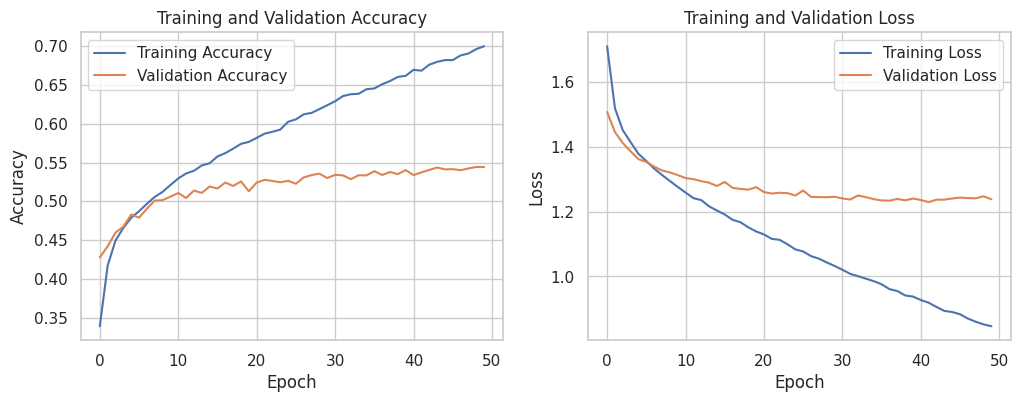

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming your model prediction function is called predict (replace it with your actual prediction function)
y_pred = transfer_model.predict(validation_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


180/180 [==============================] - 22s 110ms/step
Confusion Matrix:
[[123   0  91 229 127 149  80]
 [ 11   0   7  25  14  19  11]
 [109   1  99 253 126 134  97]
 [191   2 174 393 234 284 165]
 [128  10 128 285 169 166 107]
 [131   4 100 282 163 190  96]
 [ 72   5  71 172 125 118  71]]

Classification Report:
              precision    recall  f1-score   support

       angry       0.16      0.15      0.16       799
     disgust       0.00      0.00      0.00        87
        fear       0.15      0.12      0.13       819
       happy       0.24      0.27      0.26      1443
     neutral       0.18      0.17      0.17       993
         sad       0.18      0.20      0.19       966
    surprise       0.11      0.11      0.11       634

    accuracy                           0.18      5741
   macro avg       0.15      0.15      0.15      5741
weighted avg       0.18      0.18      0.18      5741



In [ ]:
#now we apply 3-pre trained model

In [40]:
# @title Xception
#xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained Xception model without top (fully connected layers)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)  # Assuming you have 7 classes

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Set the pre-trained layers to be non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

transfer_model.summary()


83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 17227 images belonging to 7 classes.
Found 11482 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
epochs = 50

history = transfer_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/50
538/538 [==============================] - 167s 293ms/step - loss: 1.6104 - accuracy: 0.3762 - val_loss: 1.4781 - val_accuracy: 0.4388
Epoch 2/50
538/538 [==============================] - 158s 294ms/step - loss: 1.4693 - accuracy: 0.4435 - val_loss: 1.4218 - val_accuracy: 0.4612
Epoch 3/50
538/538 [==============================] - 125s 233ms/step - loss: 1.4158 - accuracy: 0.4669 - val_loss: 1.3996 - val_accuracy: 0.4736
Epoch 4/50
538/538 [==============================] - 158s 294ms/step - loss: 1.3720 - accuracy: 0.4879 - val_loss: 1.3745 - val_accuracy: 0.4805
Epoch 5/50
538/538 [==============================] - 125s 233ms/step - loss: 1.3363 - accuracy: 0.5008 - val_loss: 1.3659 - val_accuracy: 0.4794
Epoch 6/50
538/538 [==============================] - 158s 294ms/step - loss: 1.3109 - accuracy: 0.5132 - val_loss: 1.3487 - val_accuracy: 0.4910
Epoch 7/50
538/538 [==============================] - 158s 294ms/step - loss: 1.2827 - accuracy: 0.5224 - val_loss: 1.3428 -

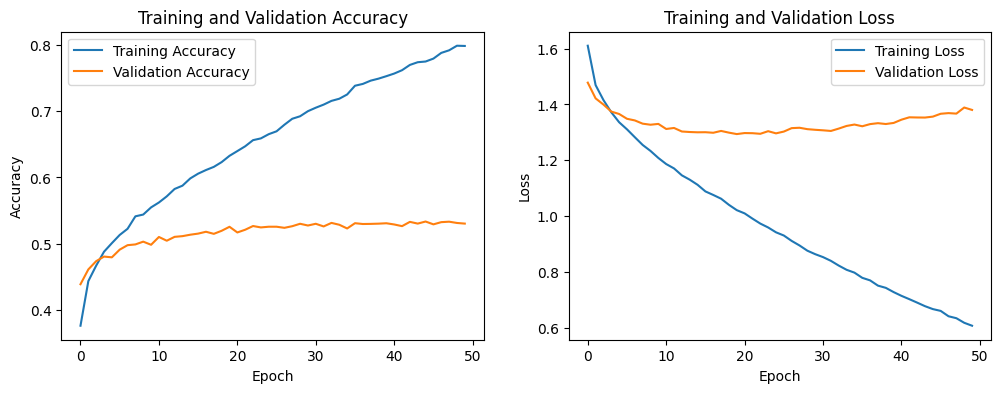

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming your model prediction function is called predict (replace it with your actual prediction function)
y_pred = transfer_model.predict(validation_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


359/359 [==============================] - 53s 147ms/step
Confusion Matrix:
[[185   8 165 474 259 263 244]
 [ 28   0  14  55  30  23  24]
 [225  11 164 452 244 297 245]
 [324  11 314 874 476 495 392]
 [262   7 223 557 332 346 259]
 [240   9 222 523 325 349 264]
 [160   4 126 378 220 209 171]]

Classification Report:
              precision    recall  f1-score   support

       angry       0.13      0.12      0.12      1598
     disgust       0.00      0.00      0.00       174
        fear       0.13      0.10      0.11      1638
       happy       0.26      0.30      0.28      2886
     neutral       0.18      0.17      0.17      1986
         sad       0.18      0.18      0.18      1932
    surprise       0.11      0.13      0.12      1268

    accuracy                           0.18     11482
   macro avg       0.14      0.14      0.14     11482
weighted avg       0.18      0.18      0.18     11482



In [ ]:
#we apply 4 pre trained model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model without top (fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Assuming you have 7 classes

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Set the pre-trained layers to be non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

transfer_model.summary()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


In [ ]:
epochs = 50

history = transfer_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming your model prediction function is called predict (replace it with your actual prediction function)
y_pred = transfer_model.predict(validation_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


In [4]:
# @title GAN

#GANS

In [5]:
# tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D, Dropout, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
import os
import PIL
import time
from IPython import display
import glob as gb

In [6]:
trainpath = r'/content/fer2013/train'
testpath = r'/content/fer2013/test'

for folder in os.listdir(trainpath):
  files =gb.glob(pathname=str(trainpath + '/' + folder +'/*.jpg'))

In [7]:
# prepraing data
batch_size = 32

data = keras.utils.image_dataset_from_directory(
    directory=trainpath,
    label_mode=None,
    batch_size=batch_size,
    image_size=(64,64))

Found 28709 files belonging to 1 classes.


In [8]:
# prepraing data
batch_size = 32

data = keras.utils.image_dataset_from_directory(
    directory=testpath,
    label_mode=None,
    batch_size=batch_size,
    image_size=(64,64))

Found 7178 files belonging to 1 classes.


In [9]:
data

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

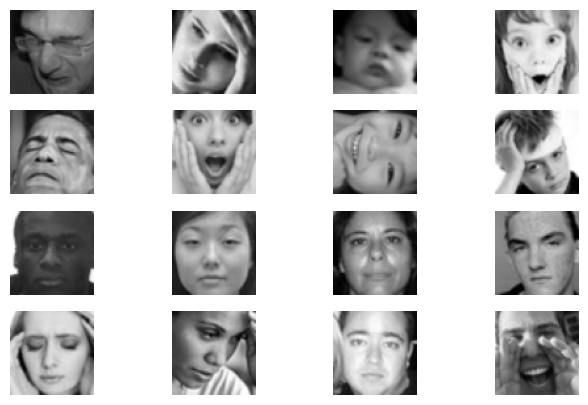

In [10]:
# some images of the dataset
plt.figure(figsize=(8,5))
for images in data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")


In [11]:
# normalizing the input image to the range [-1, 1]
data = data.map(lambda d : ((d-127.5)/127.5))
data


<_MapDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

In [12]:
# @title building discriminator
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam


In [13]:
# Discriminator
def Discriminator():
  discriminator = Sequential()
  discriminator.add(Conv2D(filters=64, kernel_size=3, strides=(2,2), padding="same", activation="LeakyReLU", input_shape=(64,64,3)))
  discriminator.add(BatchNormalization())
  discriminator.add(Dropout(0.2))

  discriminator.add(Conv2D(filters=128, kernel_size=3, strides=(2,2), padding="same", activation="LeakyReLU"))
  discriminator.add(BatchNormalization())
  discriminator.add(Dropout(0.2))

  discriminator.add(Conv2D(filters=256, kernel_size=3, strides=(2,2), padding="same", activation="LeakyReLU"))
  discriminator.add(BatchNormalization())
  discriminator.add(Dropout(0.2))

  discriminator.add(Flatten())
  discriminator.add(Dropout(0.2))
  discriminator.add(Dense(units=1, activation="sigmoid"))

  return discriminator

D_model = Discriminator()
D_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 128)       512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 128)       0

In [14]:
# optimizer
D_optm = Adam(1e-4)


In [15]:
latent_dim = 100

In [16]:
# @title building Generator
# Build the Generator function
def Generator():
  generator = Sequential()
  generator.add(Dense(units=4*4*256, input_shape =[latent_dim], use_bias=False))
  generator.add(Reshape((4,4,256)))
  generator.add(BatchNormalization())

  generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding ="same", activation ="ReLU"))
  generator.add(BatchNormalization())

  generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding ="same", activation ="ReLU"))
  generator.add(BatchNormalization())

  generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding ="same", activation ="ReLU"))
  generator.add(BatchNormalization())

  generator.add(Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=(2, 2), padding ="same", activation ="tanh"))

  return generator


# a summary of the Generetor
G_model = Generator()
G_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4096)              409600    
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 batch_normalization_3 (Bat  (None, 4, 4, 256)         1024      
 chNormalization)                                                
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         295040    
 anspose)                                                        
                                                                 
 batch_normalization_4 (Bat  (None, 8, 8, 128)         512       
 chNormalization)                                                
                                                      

In [17]:
# optimizer
G_optm = Adam(1e-4)

In [18]:
# creating random noise
random_noise = tf.random.normal([1,latent_dim])

In [19]:
# feeding random noise to Genereator
G_output_on_random_noise = G_model(random_noise, training=False)

(-0.5, 63.5, 63.5, -0.5)

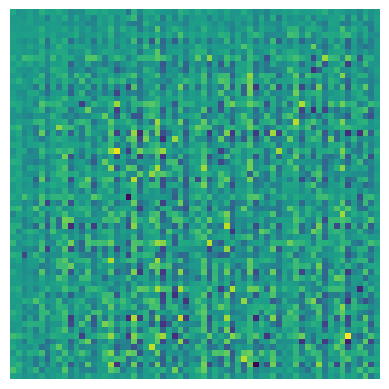

In [20]:
# showing the image output of G_model
plt.imshow(G_output_on_random_noise[0, :, :, 0])
plt.axis("off")

In [21]:
# feeding the output of Generator to Discriminator
D_output_on_random_noise = D_model(G_output_on_random_noise)
print(D_output_on_random_noise)


tf.Tensor([[0.49988368]], shape=(1, 1), dtype=float32)


In [22]:
# @title training
# The code of this cell is from keras sample.
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Decode them to fake images
        generated_images = self.generator(seed)
        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # Assemble labels discriminating real from fake images
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Sample random points in the latent space
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(seed))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}


In [23]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()


In [24]:
# Defining GAN model
model = GAN(discriminator=D_model, generator=G_model, latent_dim=latent_dim)

In [25]:
# Compiling GAN Model
model.compile(d_optimizer=D_optm, g_optimizer=G_optm, loss_fn=loss_fn)

In [27]:
# number of epochs
epochs = 20
# Fitting the GAN model
history = model.fit(data, epochs=epochs)

Epoch 1/20
225/225 [==============================] - 7s 32ms/step - d_loss: 0.0640 - g_loss: 15.2245
Epoch 2/20
225/225 [==============================] - 7s 29ms/step - d_loss: -1.2285 - g_loss: 172.9364
Epoch 3/20
225/225 [==============================] - 7s 30ms/step - d_loss: 0.6499 - g_loss: 116.9366
Epoch 4/20
225/225 [==============================] - 7s 32ms/step - d_loss: 0.0861 - g_loss: 56.3965
Epoch 5/20
225/225 [==============================] - 7s 32ms/step - d_loss: 0.2367 - g_loss: 25.0680
Epoch 6/20
225/225 [==============================] - 7s 30ms/step - d_loss: 0.2541 - g_loss: 10.9281
Epoch 7/20
225/225 [==============================] - 7s 30ms/step - d_loss: 0.3942 - g_loss: 4.8493
Epoch 8/20
225/225 [==============================] - 7s 31ms/step - d_loss: 0.3402 - g_loss: 3.4937
Epoch 9/20
225/225 [==============================] - 7s 30ms/step - d_loss: 0.3657 - g_loss: 2.8340
Epoch 10/20
225/225 [==============================] - 7s 29ms/step - d_loss: 0.42

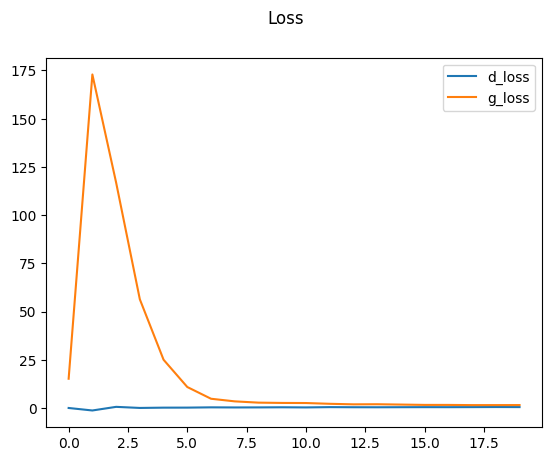

In [30]:
plt.suptitle('Loss')
plt.plot(history.history['d_loss'], label='d_loss')
plt.plot(history.history['g_loss'], label='g_loss')
plt.legend()
plt.show()


In [31]:
# @title create new images


In [32]:
# creating a random nosie to feed it to the trained Generator model
noise = tf.random.normal([32, 100])
# Generatine new images using the trained Generator model
generated_images = G_model(noise, training=False)

In [33]:
# converting the input image to the range [0, 255]
generated_images1 = (generated_images+127.5)*127.5

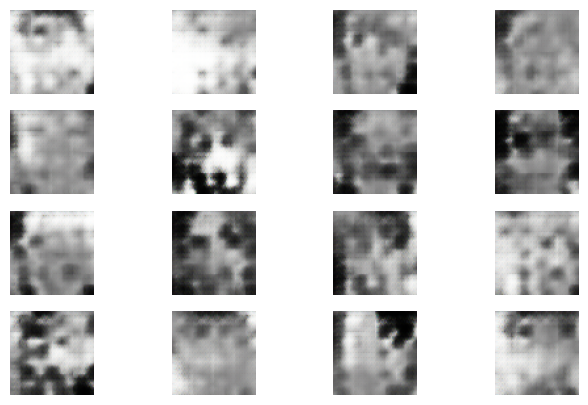

In [34]:
plt.figure(figsize=(8, 5))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(generated_images1[i].numpy().astype("uint8"))
    plt.axis('off')

plt.show()

In [35]:
import os
from PIL import Image
import numpy as np

# Define the generator and latent_dim
generator = G_model
latent_dim = 100

desired_samples = 200
synthetic_data = generator.predict(np.random.normal(0, 1, (desired_samples, latent_dim)))
save_dir = '/content/fer2013/generated _images'
os.makedirs(save_dir, exist_ok=True)

for i in range(desired_samples):
    img_array = synthetic_data[i].reshape((64, 64, 3))

    img = Image.fromarray(img_array.astype('uint8'))
    img.save(os.path.join(save_dir, f"generated_images_{i}.png"))

7/7 [==============================] - 1s 47ms/step


In [36]:
print("Generated images are saved in:", os.path.abspath(save_dir))

Generated images are saved in: /content/fer2013/generated _images
